In [1]:
import requests  # take the website source code back to you
import urllib  # some useful functions to deal with website URLs
from bs4 import BeautifulSoup as soup  # a package to parse website source code
import numpy as np  # all the numerical calculation related methods
import re  # regular expression package
import itertools  # a package to do iteration works
import pickle  # a package to save your file temporarily
import pandas as pd  # process structured data
import os

sub_dir = os.getcwd() + '/DEDA_class2019_SYSU_Abstract_LDA_Crawler/'
cwd_dir = sub_dir if os.path.exists(sub_dir) else os.getcwd()  # the path you save your files
base_link = 'http://www.wiwi.hu-berlin.de/de/forschung/irtg/results/discussion-papers'  # This link can represent the domain of a series of websites
abs_link = 'https://www.wiwi.hu-berlin.de/de/forschung/irtg/results/'
# abs_folder = cwd_dir + 'Abstracts/'
# os.makedirs(abs_folder, exist_ok=True)

request_result = requests.get(base_link, headers={'Connection': 'close'})  # get source code
parsed = soup(request_result.content)  # parse source code
tr_items = parsed.find_all('tr')
info_list = []
for item in tr_items:
    link_list = item.find_all('td')
    try:
        paper_title = re.sub(pattern=r'\s+', repl=' ', string=link_list[1].text.strip())
        author = link_list[2].text
        date_of_issue = link_list[3].text
        abstract_link = link_list[5].find('a')['href']
        info_list.append([paper_title, author, date_of_issue, abstract_link])
    except Exception as e:
        print(e)
        print(link_list[5])
        continue

abstract_all = list()

for paper in info_list:
    print(paper[0])
    try:
        paper_abstract_page = requests.get(paper[3], headers={'Connection': 'close'})

        if paper_abstract_page.status_code == 200:
            # if paper[3][-3:] == 'txt':
            abstract_parsed = soup(paper_abstract_page.content)
            main_part = abstract_parsed.find_all('div', attrs={'id': r'content-core'})[0].text.strip()
            # if paper[3][-3:] == 'pdf':
            #     abstract_parsed = soup(paper_abstract_page.content)
            #     main_part = abstract_parsed.find_all('body')[0].text.strip()

            main_part = re.sub(r'.+?[Aa]bstract', 'Abstract', main_part)
            main_part = re.sub(r'JEL [Cc]lassification:.*', '', main_part)
            main_part = re.sub(r'[A-Za-z][0-9][0-9]?', '', main_part)
            main_part = re.sub('[\r\n]+', ' ', main_part)

            abstract_all.append(main_part + "\nSEP\n")

        else:
            raise ConnectionError(f"Can not access the website. Error Code: {paper_abstract_page.status_code}")
        # with open(abs_folder + f"{re.sub('[^a-zA-Z0-9 ]', '', paper[0])}.txt", 'w', encoding='utf-8') as abs_f:
        #     abs_f.write(main_part)

    except Exception as e:
        print(e)
        print(paper[3])
        continue

with open(cwd_dir + '/Abstract_all.txt', 'w', encoding='utf-8') as abs_all_f:
    abs_all_f.writelines(abstract_all)

'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" style="width: 40px; height: 18px;"><span style="--darkreader-inline-bgcolor: #262b35;"><strong><span style="font-family: sans-serif, Arial, Helvetica, Geneva;">Abstract</span></strong></span></td>
'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" style="width: 40px; height: 18px;"><span style="--darkreader-inline-bgcolor: #262b35;"><strong><span style="font-family: sans-serif, Arial, Helvetica, Geneva;">Abstract</span></strong></span></td>
'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" height="18" style="--darkreader-inline-bgcolor: #262b35;" width="40"><strong><span style="font-family: sans-serif, Arial, Helvetica, Geneva;">Abstract</span></strong></td>
'NoneType' object is not subscriptable
<td bgcolor="#BBBBBB" data-darkreader-inline-bgcolor="" height="18" style="--darkreader-inline-bgcolor: #262b3

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 words:
risk: 230
sep: 197
model: 196
data: 140
models: 126
market: 124
paper: 94
financial: 89
network: 88
volatility: 84
results: 81
analysis: 79
time: 78
method: 74
based: 73
tail: 73
study: 66
abstract: 65
keywords: 64
regression: 61

Generating word clouds...


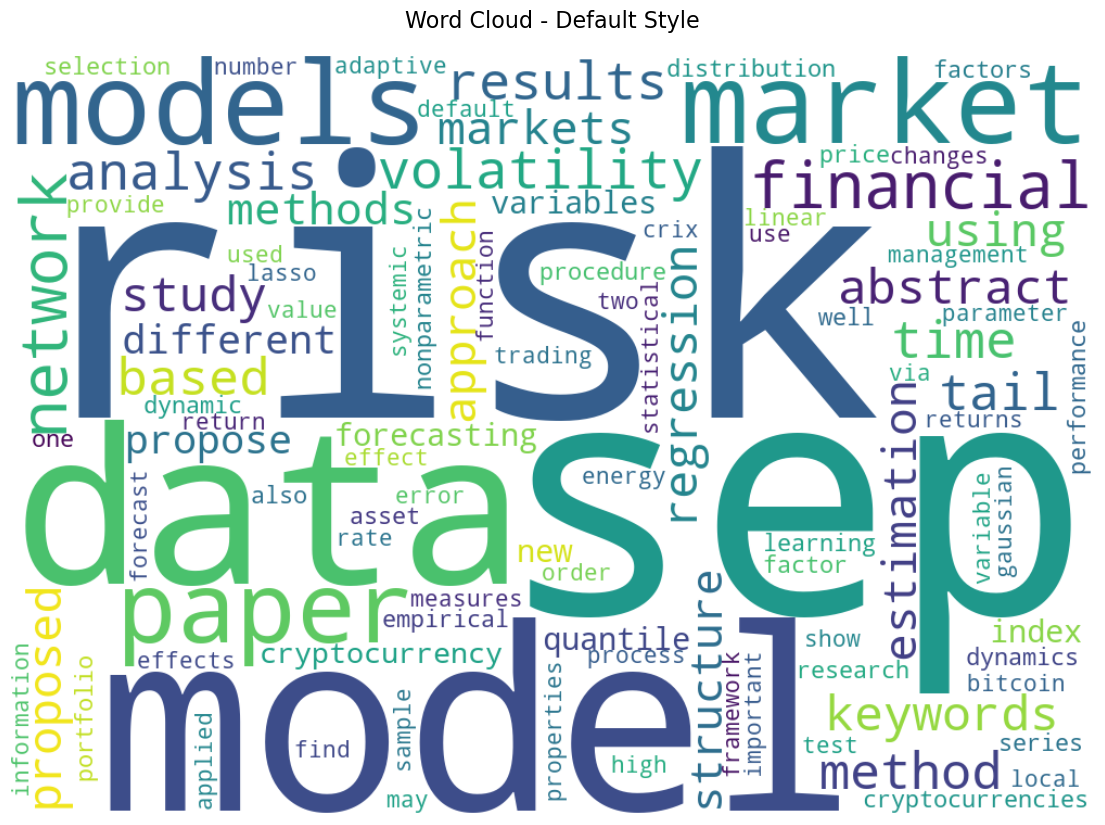

Saved: wordcloud_default.png


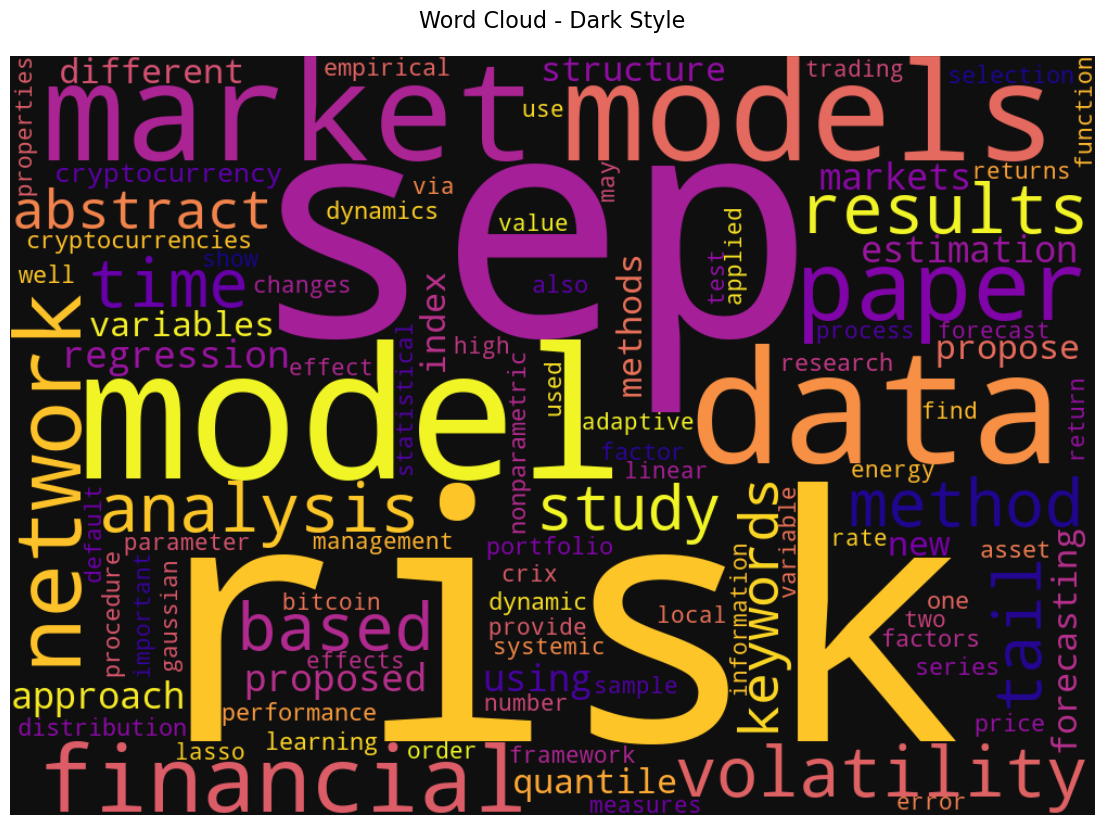

Saved: wordcloud_dark.png


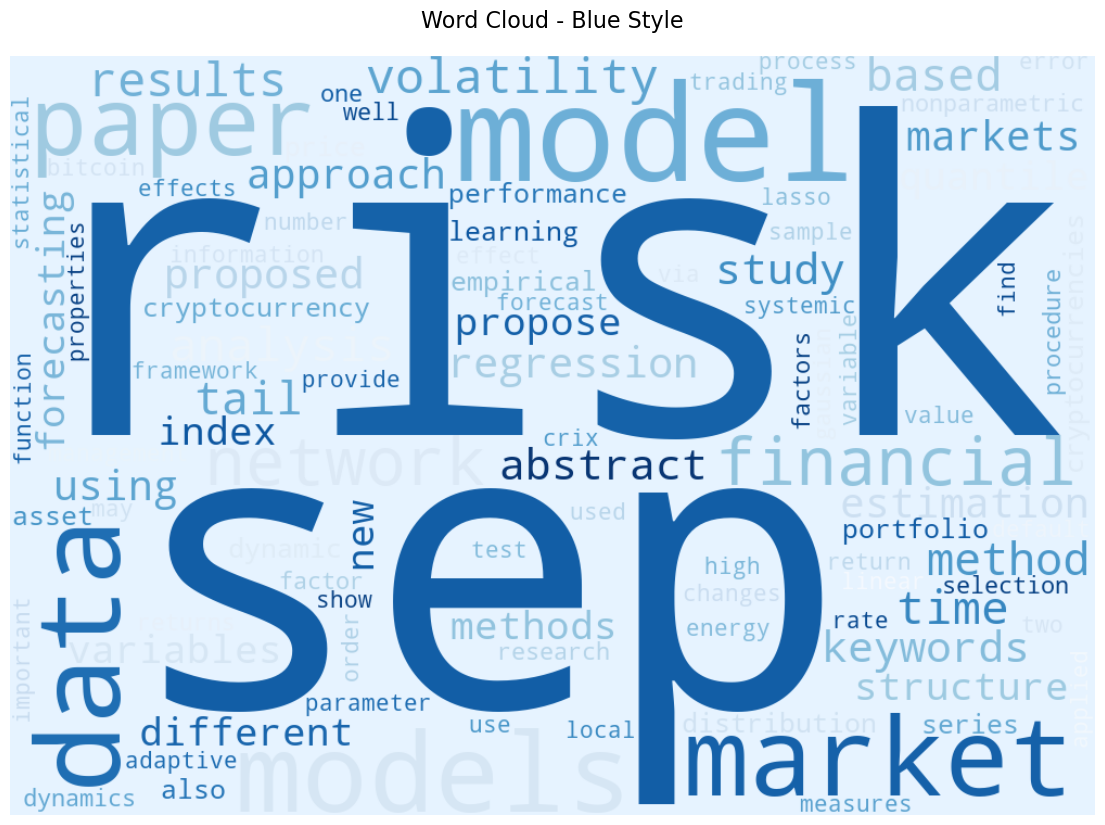

Saved: wordcloud_blue.png


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')

plt.style.use('ggplot')

def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

def preprocess_english_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'however', 'therefore', 'moreover', 'thus', 'hence'}
    stop_words.update(custom_stopwords)
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    return filtered_words

def get_word_frequencies(words, top_n=100):
    word_counts = Counter(words)
    return dict(word_counts.most_common(top_n))

def generate_word_cloud(word_freq, style='default'):
    wc_config = {
        'width': 1000,
        'height': 700,
        'background_color': 'white',
        'max_words': 200,
        'colormap': 'viridis',
        'collocations': False
    }
    
    if style == 'dark':
        wc_config.update({
            'background_color': '#0f0f0f',
            'colormap': 'plasma'
        })
    elif style == 'blue':
        wc_config.update({
            'background_color': '#e6f3ff',
            'colormap': 'Blues'
        })
    elif style == 'shape':
        mask = np.array(Image.open("cloud_shape.png"))
        wc_config.update({
            'mask': mask,
            'contour_width': 1,
            'contour_color': 'steelblue'
        })
    
    wordcloud = WordCloud(**wc_config)
    wordcloud.generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    title = "Word Cloud - " + style.capitalize() + " Style"
    plt.title(title, fontsize=16, pad=20)
    
    plt.show()
    
    filename = f'wordcloud_{style}.png'
    wordcloud.to_file(filename)
    print(f"Saved: {filename}")

def main():
    text = read_text_file('Abstract_all.txt')
    words = preprocess_english_text(text)
    word_freq = get_word_frequencies(words)
    
    print("Top 20 words:")
    for word, count in sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]:
        print(f"{word}: {count}")
    
    print("\nGenerating word clouds...")
    generate_word_cloud(word_freq, style='default')
    generate_word_cloud(word_freq, style='dark')
    generate_word_cloud(word_freq, style='blue')

if __name__ == "__main__":
    main()

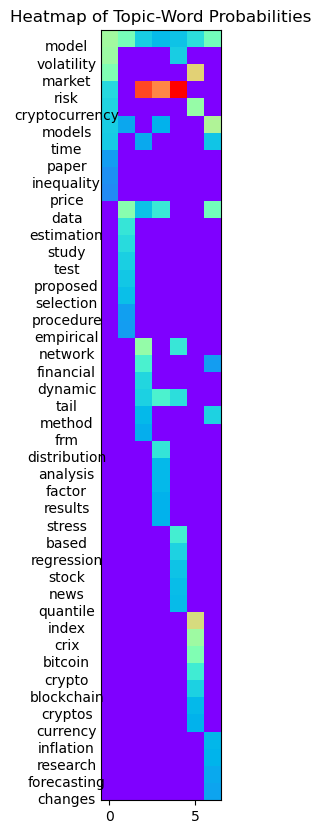

In [2]:


import re
import gensim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Load the text file
file_path = "Abstract_all.txt"
with open(file_path, 'r', encoding='utf-8') as f:
    documents = f.readlines()

# Function to remove specific keywords
def remove_keywords(text):
    keywords = ['Abstract', 'Keywords', 'SEP']
    for kw in keywords:
        text = re.sub(r'\b' + kw + r'\b', '', text)
    return text

# Preprocess text, removing stopwords and non-alphabetic words
def preprocess_text(text):
    text = remove_keywords(text)
    return [word for word in gensim.utils.simple_preprocess(text) if word not in ENGLISH_STOP_WORDS and word.isalpha()]

# Preprocess all documents
processed_docs = [preprocess_text(doc) for doc in documents]

# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Number of topics
num_topics = 7

# Train LDA model using gensim
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, random_state=3154)

# Print topics
topicWordProbMat = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

# Create the DataFrame for the heatmap
columns = ['Topic ' + str(x) for x in range(1, num_topics + 1)]
df = pd.DataFrame(columns=columns)
DC = {}  # Dictionary to map words to row indices
zz = np.zeros((100, num_topics))
last_number = 0

# Populate the DataFrame and the probability matrix
for topic_id, words_probs in topicWordProbMat:
    for word, prob in words_probs:
        word = word.strip()
        if word in DC:
            zz[DC[word], topic_id] = prob
        else:
            zz[last_number, topic_id] = prob
            DC[word] = last_number
            last_number += 1

# Resize the matrix to match the actual number of words
zz = np.resize(zz, (len(DC.keys()), zz.shape[1]))

# Plotting the heatmap
plt.figure(figsize=(20, 10))
plt.imshow(zz, cmap='rainbow', interpolation='nearest')

# Annotate the heatmap with words
for val, key in enumerate(DC.keys()):
    plt.text(-2.5, val + 0.5, key, horizontalalignment='center', verticalalignment='center')

# Set title and remove y-ticks (since we'll annotate manually)
plt.title("Heatmap of Topic-Word Probabilities")
plt.yticks([])
plt.savefig("heatmap_abstract.png", transparent=True, dpi=400)
plt.show()
